In [1]:
import pyslm
import pyslm.visualise
from pyslm import hatching as hatching
from pyslm.hatching import BaseHatcher
# from pyslm.hatching import HatchStyle

In [2]:
solidPart = pyslm.Part('rectangle')
solidPart.setGeometry('../models/cuboid.stl')

# Drop the part to the build platform
# solidPart.dropToPlatform()
# solidPart.rotation([1,0,-1])

In [4]:
# Rotate the part
# solidPart.rotate([0, 0, 1], np.pi/4)

# Scale the part
# solidPart.scale(0.5)

# Modifying the vertical component of the part origin directly
# solidPart.translate[3] = 20.0
solidPart.regenerate()
trimeshGeom = solidPart.geometry

In [9]:

# Imports the part and sets the geometry to an STL file (frameGuide.stl)
solidPart = pyslm.Part('myFrameGuide')
solidPart.setGeometry('../models/frameGuide.stl')
# solidPart.dropToBuildPlatform()


(<Figure size 640x480 with 1 Axes>, <Axes: >)

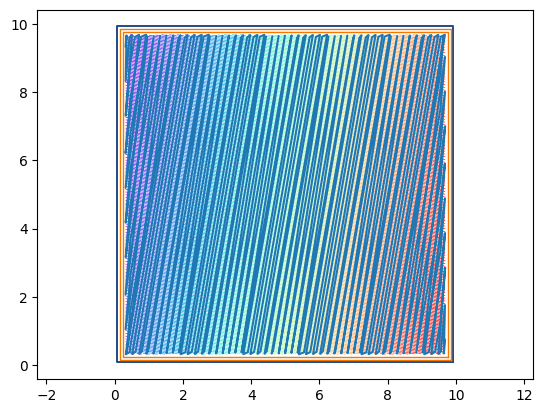

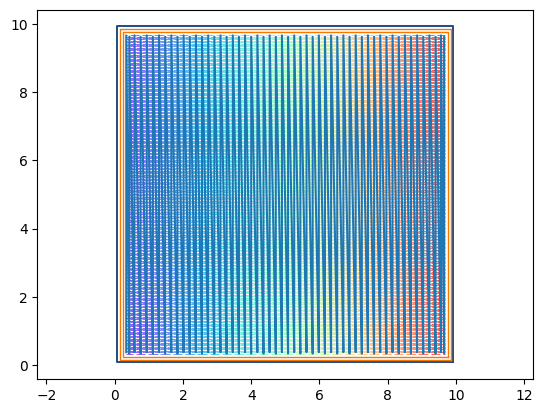

In [3]:

# Set te slice layer position
z = 1

# Create a StripeHatcher object for performing any hatching operations
myHatcher = hatching.StripeHatcher()
myHatcher.stripeWidth = .180 # [mm]

smyHatcher = hatching.StripeHatcher()
smyHatcher.stripeWidth = .180 # [mm]

# Set the base hatching parameters which are generated within Hatcher
myHatcher.hatchAngle = 10# [°]
myHatcher.volumeOffsetHatch = 0.08 # [mm]
myHatcher.spotCompensation = 0.08 # [mm]
myHatcher.numInnerContours = 2
myHatcher.numOuterContours = 1

smyHatcher.hatchAngle = 0# [°]
smyHatcher.volumeOffsetHatch = 0.08 # [mm]
smyHatcher.spotCompensation = 0.08 # [mm]
smyHatcher.numInnerContours = 2
smyHatcher.numOuterContours = 1
# Slice the object at Z and get the boundaries
geomSlice = solidPart.getVectorSlice(z)

# Perform the hatching operations
layer = myHatcher.hatch(geomSlice)
layer2 = smyHatcher.hatch(geomSlice)


# Plot the layer geometries generated
pyslm.visualise.plot(layer, plot3D=False, plotOrderLine=True)#, plotArrows=True)
pyslm.visualise.plot(layer2, plot3D=False, plotOrderLine=True) # plotArrows=True)
# pyslm.visualise.plotSequential(layer2, plot3D=False,plotJumps=True)# plotOrderLine=True) # plotArrows=True)

# pyslm.visualise.plotSequential(layer2, plotJumps=True)

In [7]:
import pyslm.analysis

# For each layer geometry assign the same model and build style
def mstyle(layer):
    for layerGeom in layer.geometry:
        layerGeom.mid = 1
        layerGeom.bid = 1
        
        # Create a build style and include basic laser parameters
bstyle = pyslm.geometry.BuildStyle()
bstyle.bid = 1
bstyle.laserSpeed = 200  # [mm/s]
bstyle.laserPower = 200  # [W]
bstyle.jumpSpeed  = 5000 # [mm/s]
        
        # Create a model and assign the build style
model = pyslm.geometry.Model()
model.mid = 1
model.buildStyles.append(bstyle)


In [8]:
import pyslm.analysis

# Obtain geometrical information for the layer
mstyle(layer)
print('Total Path Distance: {:.6f} mm'.format(pyslm.analysis.getLayerPathLength(layer)))
print('Total jump distance {:.6f} mm'.format(pyslm.analysis.getLayerJumpLength(layer)))

# Estimate the time taken to scan the layer using the model
print('Time taken {:.6f} s'.format(pyslm.analysis.getLayerTime(layer, [model])) )

mstyle(layer2)
# Obtain geometrical information for the layer
print('Total Path Distance: {:.6f} mm'.format(pyslm.analysis.getLayerPathLength(layer2)))
print('Total jump distance {:.6f} mm'.format(pyslm.analysis.getLayerJumpLength(layer2)))

# Estimate the time taken to scan the layer using the model
print('Time taken {:.6f} s'.format(pyslm.analysis.getLayerTime(layer2, [model])) )


Total Path Distance: 1820.350480 mm
Total jump distance 2287.685341 mm
Time taken 9.559289 s
Total Path Distance: 1820.172000 mm
Total jump distance 2269.542643 mm
Time taken 9.554769 s
